In [13]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt



In [14]:
def calculate_ema(stock_data, N):
    if len(stock_data) < N:
        raise ValueError("Not enough data points to calculate EMA.")

    alpha = 2 / (N + 1)  # EMA smoothing factor
    ema_values = [stock_data['close'].iloc[0]]

    for i in range(1, len(stock_data)):
        current_close = stock_data['close'].iloc[i]
        ema = (current_close - ema_values[-1]) * alpha + ema_values[-1]
        ema_values.append(ema)

    return pd.Series(ema_values, index=stock_data.index)

In [15]:
AAPL_stock = pd.read_csv('./datas/AAPL_stock.csv')

AAPL_stock['date_time'] = pd.to_datetime(AAPL_stock['date_time'])
AAPL_stock = AAPL_stock.set_index('date_time')
AAPL_stock['ema_14'] = calculate_ema(AAPL_stock,14)
AAPL_stock.columns

Index(['symbol', 'high', 'low', 'open', 'close', 'adj_close', 'volume',
       'ema_14'],
      dtype='object')

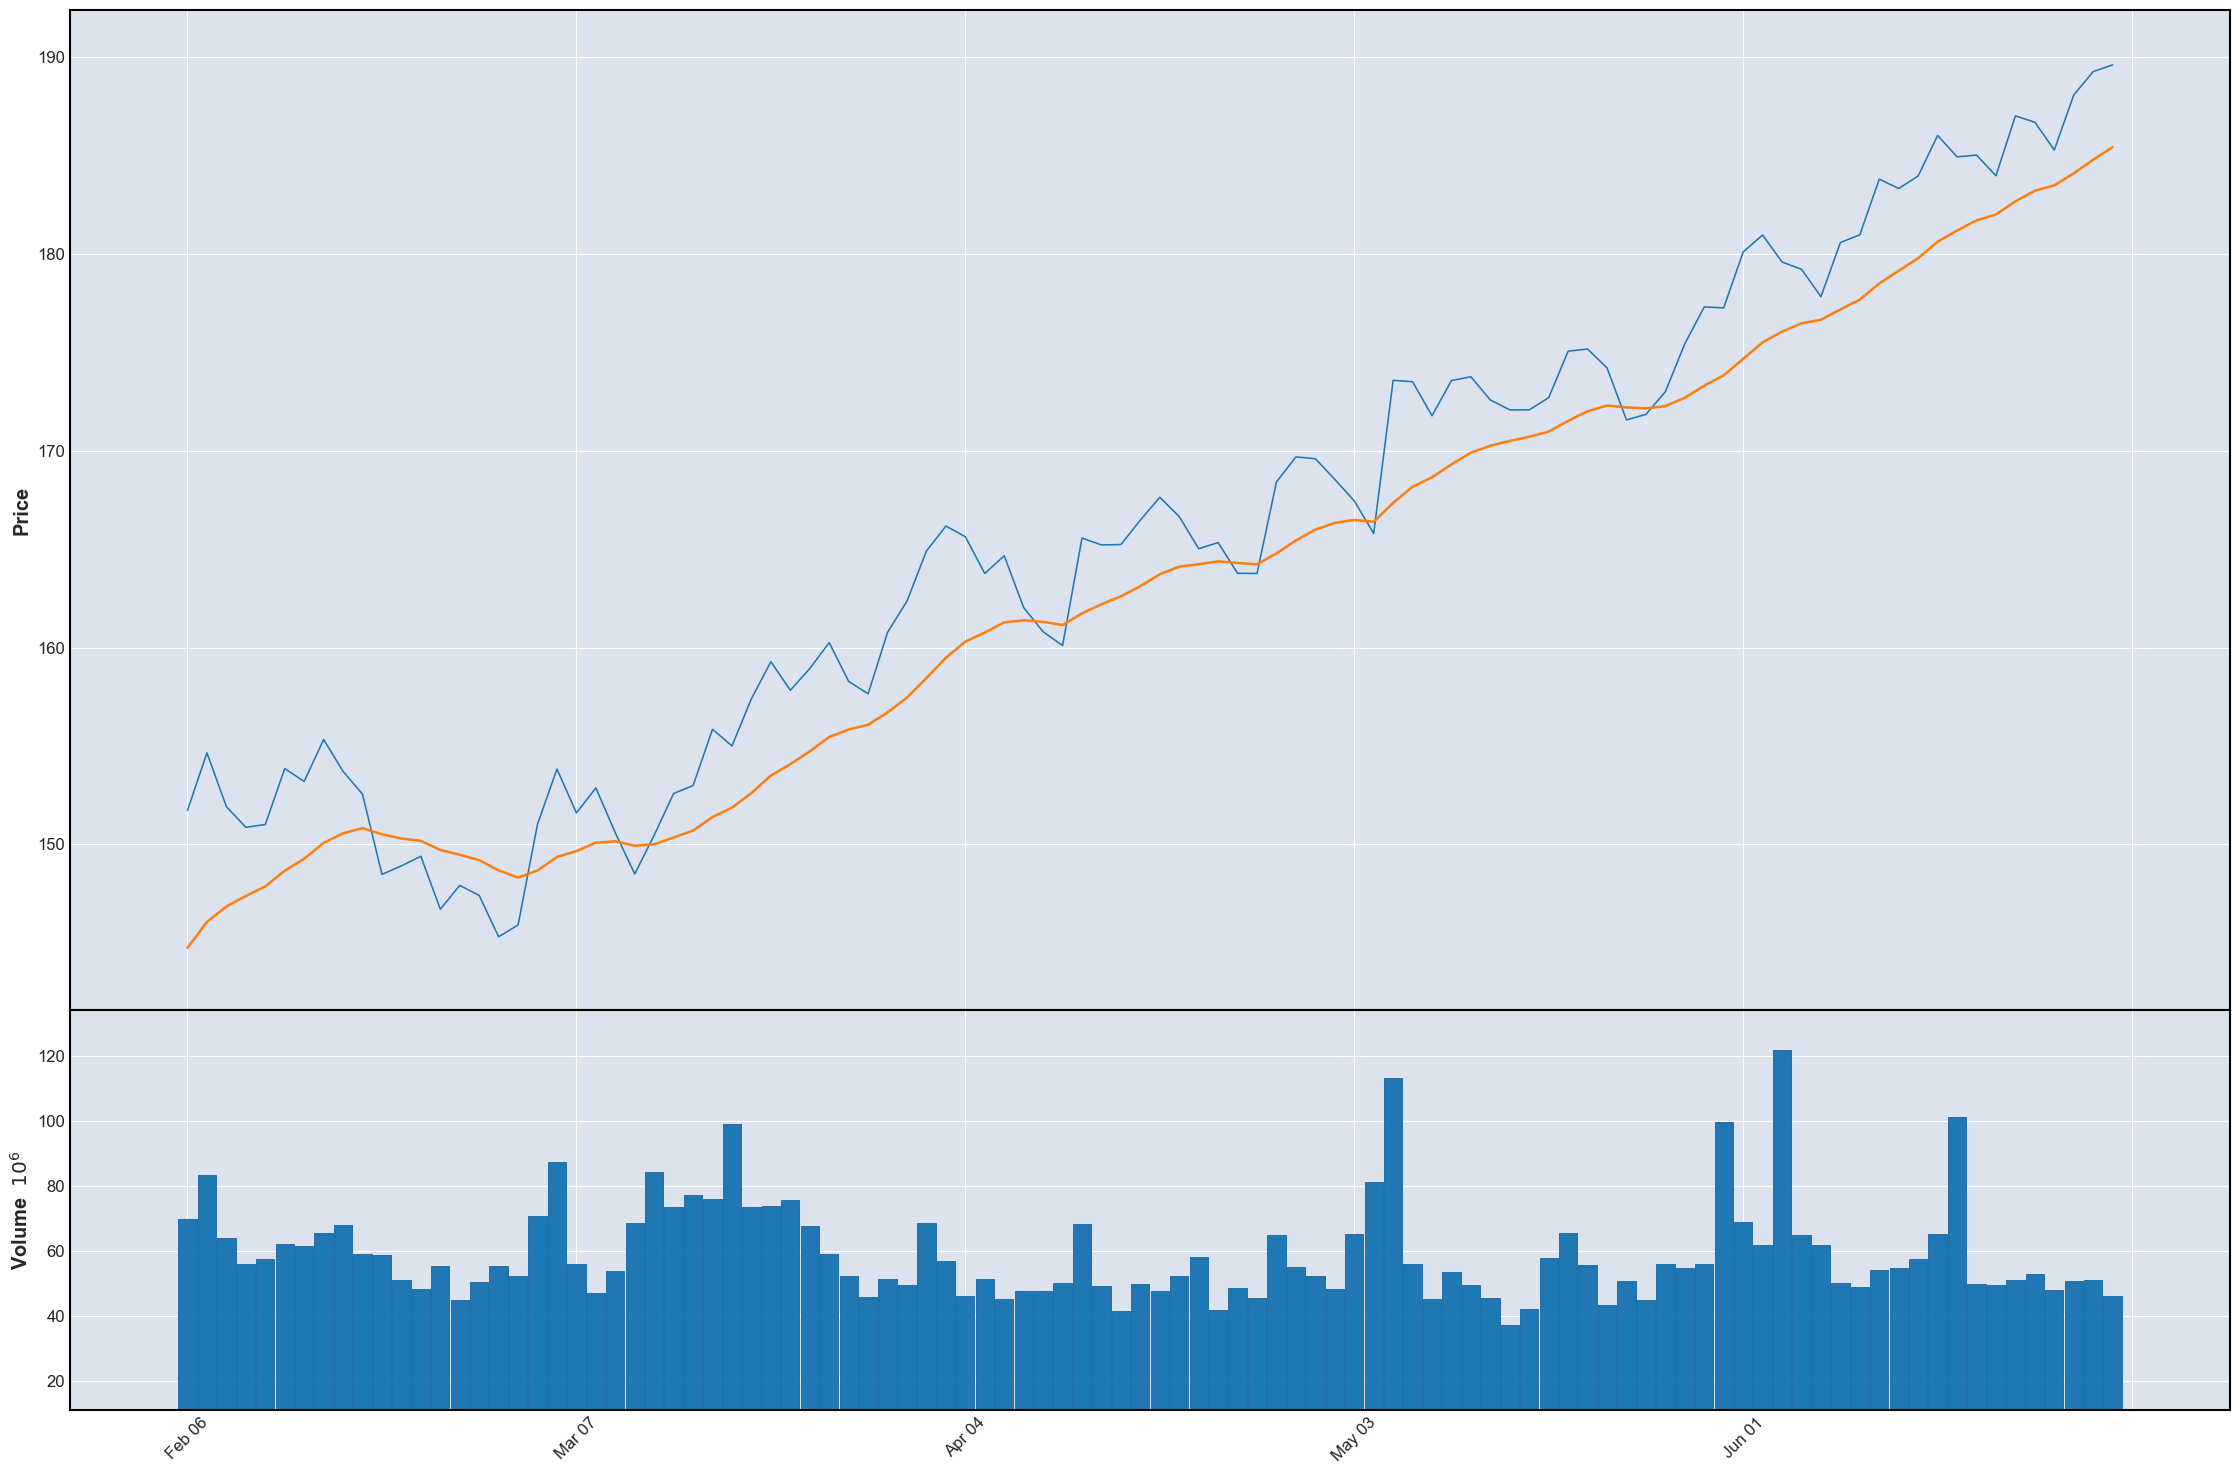

In [17]:
mpf.plot(AAPL_stock[-100:],type='line
         ',
         #mav=(10),
         volume = True, 
         #show_nontrading=True,
        figsize=(30,20),
        
         addplot=[mpf.make_addplot(AAPL_stock[-100:]['ema_14'])]
)